In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Drug safety and pharmacovigilance.csv')

In [3]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df[(df['Age']>40)&(df['Drug'])].head(30)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
4,61,F,LOW,HIGH,18.043,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY
10,47,F,LOW,HIGH,11.767,drugC
12,43,M,LOW,HIGH,15.376,DrugY
13,74,F,LOW,HIGH,20.942,DrugY


In [10]:
df[(df['Age'] < 30) & (df['BP'] == 'HIGH') & (df['Cholesterol'] == 'HIGH')]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
66,29,M,HIGH,HIGH,12.856,drugA
78,19,F,HIGH,HIGH,13.313,drugA
92,29,F,HIGH,HIGH,29.450,DrugY
169,20,F,HIGH,HIGH,11.262,drugA
184,18,F,HIGH,HIGH,37.188,DrugY
191,23,M,HIGH,HIGH,8.011,drugA


In [11]:
df.groupby('BP').count() 

,Age,Sex,Cholesterol,Na_to_K,Drug
BP,,,,,
HIGH,77,77,77,77,77
LOW,64,64,64,64,64
NORMAL,59,59,59,59,59


In [12]:
df.groupby(['BP','Cholesterol']).count()

Age  Sex  Na_to_K  Drug
BP     Cholesterol                         
HIGH   HIGH          35   35       35    35
       NORMAL        42   42       42    42
LOW    HIGH          31   31       31    31
       NORMAL        33   33       33    33
NORMAL HIGH          37   37       37    37
       NORMAL        22   22       22    22

In [13]:
df.groupby(['Age','Drug',]).count()

Sex  BP  Cholesterol  Na_to_K
Age Drug                                
15  DrugY    2   2            2        2
    drugX    1   1            1        1
16  DrugY    2   2            2        2
    drugC    1   1            1        1
17  drugX    1   1            1        1
...        ...  ..          ...      ...
72  drugX    1   1            1        1
73  DrugY    2   2            2        2
74  DrugY    2   2            2        2
    drugB    1   1            1        1
    drugX    1   1            1        1

[135 rows x 4 columns]

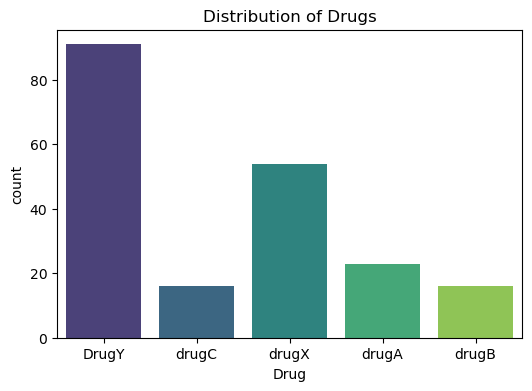

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Drug', data=df, hue='Drug', legend=False, palette='viridis')
plt.title("Distribution of Drugs")
plt.show()

The visual insight indicates that "DrugY" is the most frequently recorded drug, significantly outnumbering the other drugs in the dataset. 

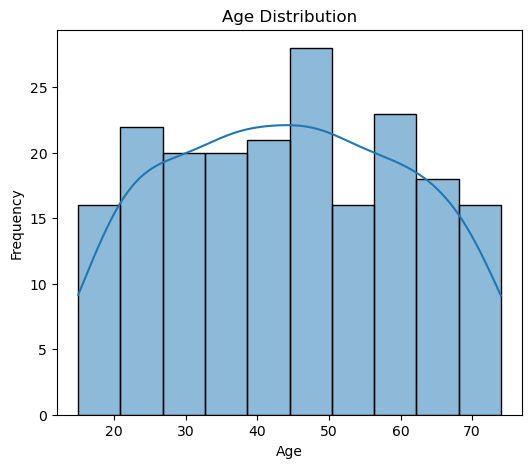

In [28]:
# Age distribution
plt.figure(figsize=(6,5))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Peak Frequency: Highest at ages 40-50.
* Shape: Roughly bell-shaped distribution.
* Right Skew: Decrease in frequency for ages above 60.
* Low Frequencies: Fewer individuals under 30.
* Demographic: Primarily middle-aged population.

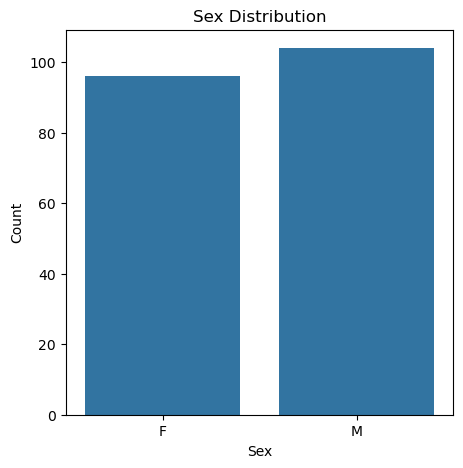

In [16]:
# Sex distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The counts for males (M) and females (F) are relatively equal, suggesting a balanced representation in the dataset. But Male is slightly greater than Female

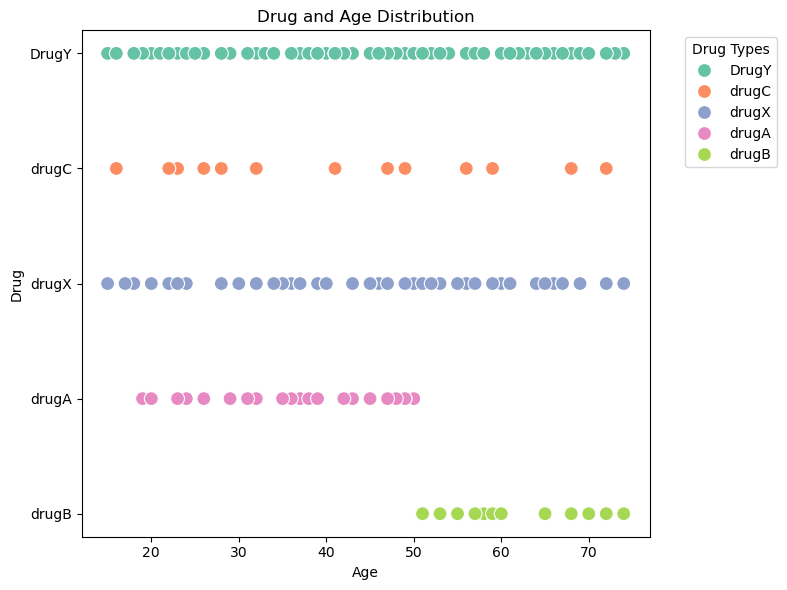

In [35]:
# Scatter plot for Drug vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Drug', data=df, hue='Drug', palette='Set2', s=100)
plt.title("Drug and Age Distribution")
plt.xlabel("Age")
plt.ylabel("Drug")
plt.legend(title="Drug Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Drug-Specific Patterns:

* DrugY: Appears to be more commonly associated with older age groups (40-70).
* drugC: Shows some presence across multiple ages but more concentrated in younger populations.
* drugX: Also indicates usage primarily among younger individuals.
* drugA and drugB: Display more definitive clustering, suggesting particular age preferences or prescribing patterns.
                drugA appears in 20-50 age group and drugB appears in 50 above age group

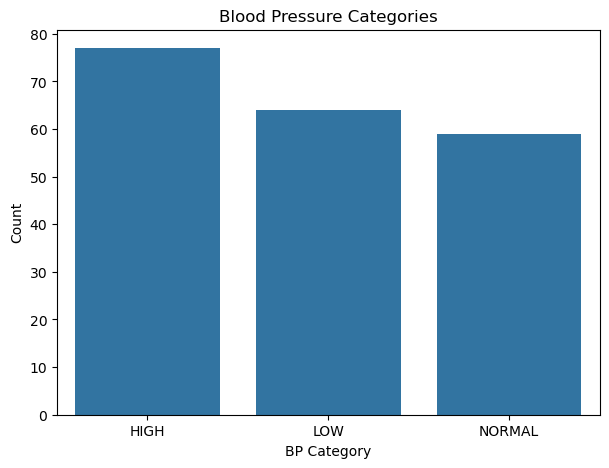

In [18]:
# Plot BP categories
plt.figure(figsize=(7,5))
sns.countplot(x='BP', data=df)
plt.title('Blood Pressure Categories')
plt.xlabel('BP Category')
plt.ylabel('Count')
plt.show()

The length of each bar indicates the number of individuals classified into each blood pressure category, with High having the most significant count, followed by Normal, and Low having the least.

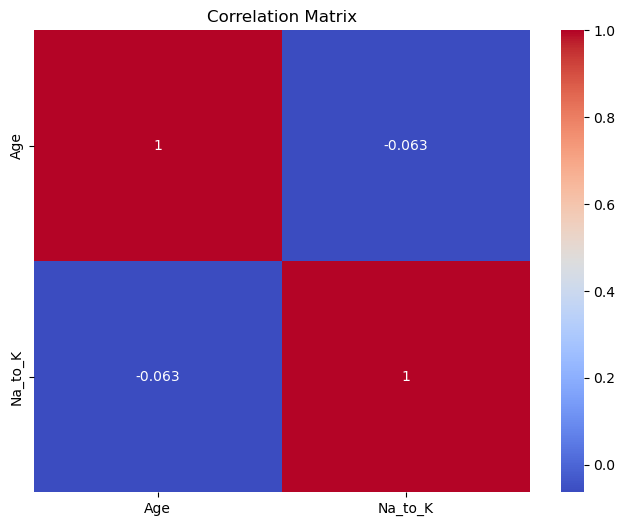

In [20]:
# Correlation between numerical features
corr_matrix = df[['Age','Na_to_K']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

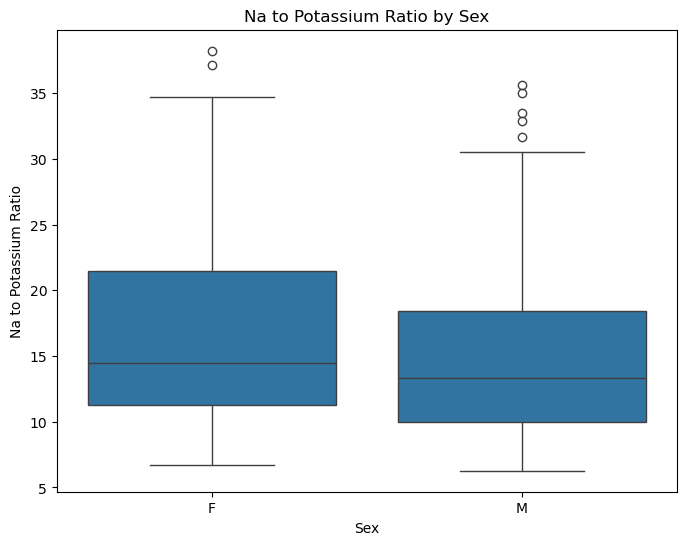

In [21]:
# Na to Potassium Ratio by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Na_to_K', data=df)
plt.title('Na to Potassium Ratio by Sex')
plt.xlabel('Sex')
plt.ylabel('Na to Potassium Ratio')
plt.show()

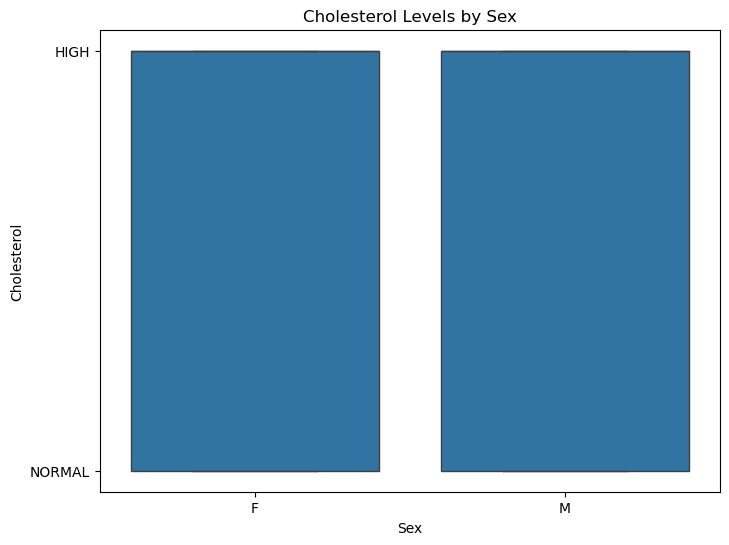

In [22]:
# Cholesterol Levels by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

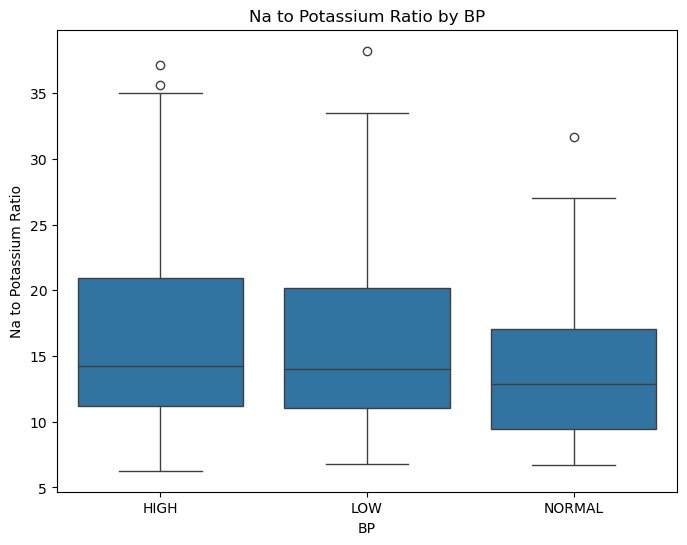

In [23]:
# Na to Potassium Ratio by BP
plt.figure(figsize=(8,6))
sns.boxplot(x='BP', y='Na_to_K', data=df)
plt.title('Na to Potassium Ratio by BP')
plt.xlabel('BP')
plt.ylabel('Na to Potassium Ratio')
plt.show()

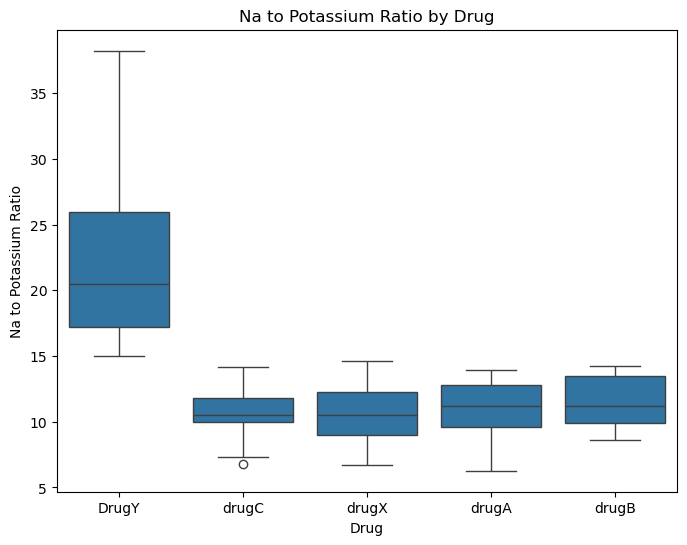

In [24]:
# Na to Potassium Ratio by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Drug', y='Na_to_K', data=df)
plt.title('Na to Potassium Ratio by Drug')
plt.xlabel('Drug')
plt.ylabel('Na to Potassium Ratio')
plt.show()

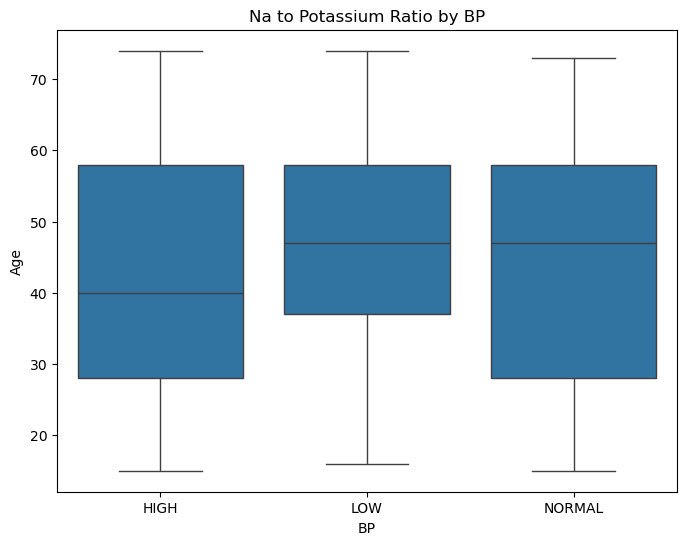

In [25]:
# Na to Potassium Ratio by Age
plt.figure(figsize=(8,6))
sns.boxplot(x='BP', y='Age', data=df)
plt.title('Na to Potassium Ratio by BP')
plt.xlabel('BP')
plt.ylabel('Age')
plt.show()

<Axes: >

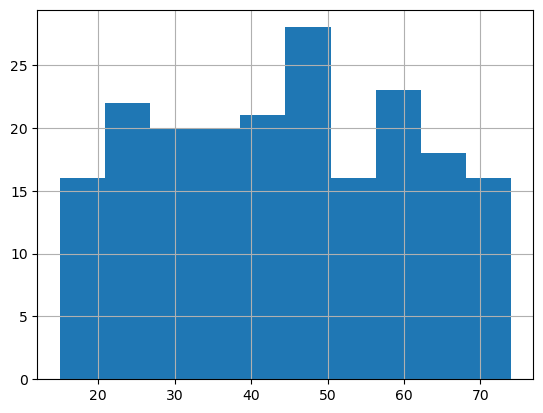

In [26]:
df['Age'].hist()

<Axes: xlabel='Na_to_K', ylabel='Age'>

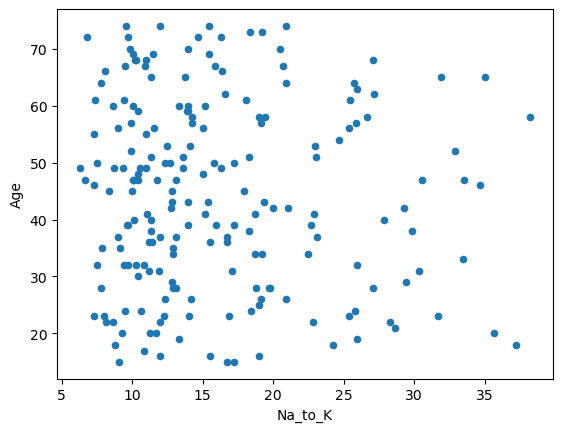

In [27]:
df.plot.scatter(x='Na_to_K',y='Age')

The Na_to_K values range from around 5 to 37, indicating a wide variation in this metric as well.

In [36]:
# Data preprocessing

In [37]:
df.head(11)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [38]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Sex','BP','Cholesterol','Drug']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [39]:
df.head(11)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [40]:
# Splitting features and target variable
X = df.drop(columns=['Drug'])
y = df['Drug']

In [41]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [43]:
# Building Model

In [44]:
# Using Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Prediction
y_pred = model.predict(X_test)

In [48]:
# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11

    accuracy                           0.95        40
   macro avg       0.94      0.93      0.92        40
weighted avg       0.96      0.95      0.95        40



In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.95


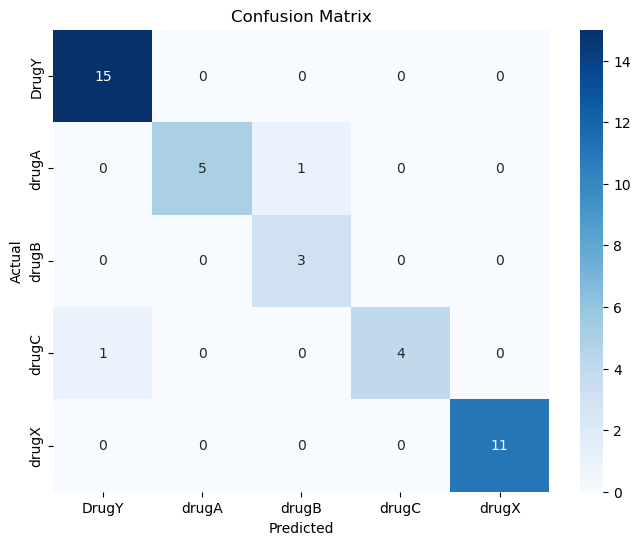

In [55]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.inverse_transform(range(len(conf_matrix))),
            yticklabels=label_encoder.inverse_transform(range(len(conf_matrix))))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
# Saving Model
import joblib
joblib.dump(model, "drug_classification_model.pkl")

['drug_classification_model.pkl']